## Project: Galaxies



In this project, we have to plot a radial light distribution of elliptical galaxy from the provided data and hence understand the de Vaucouleuers' law (the R$^{1/4}$ law) from the results acquired. 

de Vaucouleurs' law describes how the surface brightness I of an elliptical galaxy varies as a function of apparent distance R
from the center of the galaxy:

ln I(R)=ln I($R_e)-k$R$^{1/4}$

For an elliptical galaxy, this formula converts to

I(R)=I($R_e$)  exp(-7.667(($R/$$R_e$)$^{1/4}$-1))

The $R_e$ used above is the effective radius defined as the radius of a circle that contains half of the light emitted from the galaxy. It can be calculated and is shown later.

To make the codes run, we need to import packages into our terminal. The imported packages are given below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.integrate import quad
%matplotlib inline

## Exercise 1:

### In a galaxy at a distance of d Mpc, what would be the apparent B magnitude of a star like our Sun? In this galaxy, show that 1'' on the sky corresponds to 5d pc, and hence that the surface brightness I=27 mag/arcsec$^2$ is equivalent to 1 $L_{sun}$ pc$^{-2}$.

For a galaxy at a distance of d Mpc, the apparent flux, B is given by

B=$\frac{L_{sun}}{4*\Pi*d^2}$

For proving the above, we use 

Angle = $\frac{Arc}{Radius}$

Also, Surface brightness, 

I=$\frac{B}{\alpha^2}$

In [2]:
def conv(c):                             #convert from degree to radians
    b=c*np.pi/180
    return b
def func(an,r):                          #arc=angle*radius
    ar=an*r
    return ar



c=1/3600                                
an=conv(c)
r=1000000
arc=func(an,r)
print(f"Angle of 1\" is equal to {c} degrees")
print(f"Distance= {arc}d pc ~ 5d pc\n")

print("L/(4\u03A0d\u00B2)/\u03B1\u00B2=")


Angle of 1" is equal to 0.0002777777777777778 degrees
Distance= 4.84813681109536d pc ~ 5d pc

L/(4Πd²)/α²=


## Exercise 2:


### I(R)=I(R$_e$)exp{-7.67[(R/R$_e$)$^{1/4}$–1]},

### Show that the above formula yields a total luminosity of: L≈7.22πR$_e$$^2$I(R$_e$) (remember that $\int$e$^{-t}$t$^7$dt=Γ(8)=7!).

Luminosity is the total amount of electromagnetic energy emitted per unit of time by a star, galaxy, or other astronomical object. In other words, luminosity is electromagnetic power emitted by astronomical objects. Hence, it is related to surface brightness (intensity) as follows:

L=$\int_0^\infty$$\int_0^\infty$ I(R).dx.dy

In polar co-ordinates, this equation changes to

L=$\int_0^{2\pi}$$\int_0^\infty$ I(R).r.dr.d$\theta$

In [3]:
def inte(x):                                          #to solve integral
    return np.exp(-7.67*((x)**(1/4)-1))*x

r,e=quad(inte,0,np.inf)                          
i=r*2                                                 #value of integral excluding constant R
print(f"Integrand={i}\u03C0")

Integrand=7.214334719150423π


Hence, we get 

L=7.214334719150423πR$_e$$^2$I(R$_e$) ≈ 7.22πR$_e$$^2$I(R$_e$)

## Exercise 3:

### Use a table of incomplete Γ functions to show that half of this light in an elliptical galaxy comes from within radius R$_e$.


Incomplete gamma functions are that either has an upper or a lower limit. They are bounded below or above by a certain number. The sum of upper and lower gamma functions give rise to complete gamma fuctions.

$\Gamma(\alpha)= \Gamma(\alpha$,x) + $\gamma(\alpha,x)$

$\gamma(\alpha,x)=\int_0^x t^{a-1} e^{-t}dt$

Solution to lower incomplete gamma function is given by

$\gamma(\alpha,x)=(\alpha-1)!(1-e^{-x}e_{\alpha-1}(x)) $                               

Also, we have

$\int$e$^{-t}$t$^7$dt=Γ(8)=7!                                                          

We have to prove that L$_{total}$=2*L$_{R_e}$ or $\frac{L_{total}}{L_{R_e}}$ = 2

$\frac{\gamma(\alpha,x)}{\Gamma(\alpha)}$

After solving, we get

$\frac{7!(1-e^{-R_e}e_{7}(R_e))}{7!}$

using approximation
e$^{-R_e}$e$_{7}$(R$_e$)=$\frac{1}{2}$

we get 

$\frac{\gamma(\alpha,x)}{\Gamma(\alpha)}$=$\frac{1}{2}$

which proves the property of effective radius. 

### Study of elliptical galaxies using images from Skinakas observatory.

To study the images of galaxies, we need to remove all the additional effects caused due to cosmic rays.

In [4]:
hdu2=fits.open("C:\\Users\\91940\\OneDrive\\Desktop\\Observations\\M32_V_ExpTime60s_2.fit")      #opening fits file of galaxy image
hdu1=fits.open("C:\\Users\\91940\\OneDrive\\Desktop\\Observations\\MasterBias.fit")              #opening fits file of mean bias frame
hdu3=fits.open(r'C:\Users\91940\OneDrive\Desktop\Observations\NormFlatV.fit')                    #openig fits file of flat field image

Now we transfer all the data of these images to handle it and make it readable.

In [5]:
img1=hdu1[0].data                                                                                #entering data to the img1 file
img2=hdu2[0].data
img3=hdu3[0].data

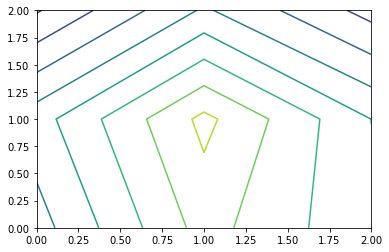

In [6]:
img=img2-img1                                              #subtracting mean bias frame from the original galaxy image     
img=img/(img1-img3)                                        #dividing the flat-field image from the V-band image
plt.contour(img[1035:1038,1025:1028])                      #[y_range,x_range]

### What is the shape of the galaxy isophotes close to its centre?

The shape of contour near the centre of galaxy is almost circular.

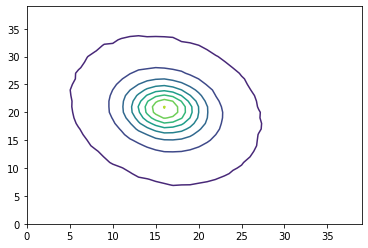

In [7]:
plt.contour(img[1015:1055,1010:1050])                      #for outermost isophote, we define range of the galaxy image 

### How do the outermost galaxy isophotes look like? Do they look similar to the central isophotes? If not, can you provide one possible explanation?

The outermost galaxy appears elliptical in shape. This is due to the symmetrical distribution of surface brightness from the light source (i.e. galaxy).

No, the outermost and the innermost isophotes do not look similar. The innermost isophote is slightly elliptical with the principle axes alligned perpendicularly with the outermost isophote.

The shape of innermost isophote differs because of its shape with respect to the rest of the galaxy. Almost every galaxy has a bulge at the centre. This bulge alters the view in a way that when seen from a particular angle, its isophote appears distorted and axes not coinciding with those of outermost isophote. 

For knowing the type of elliptical galaxy, we need to calculate its ellipticity, $\varepsilon=1-\frac{a}{b}$, where a and b are minor and major axis lenghts respectively. For this, we need to draw its major and minor axes and calculate them.

Then calculate n=10*$\varepsilon$

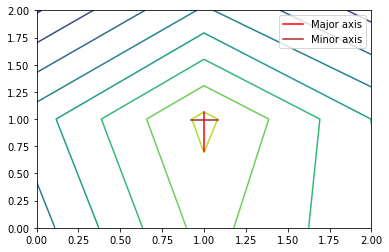

In [8]:
plt.contour(img[1035:1038,1025:1028])                              
plt.plot([0.999,0.999],[1.061,0.709],color='red',label="Major axis")            #the major axis of the innermost contour
plt.plot([0.923,1.084],[0.996,0.996],color='brown',label="Minor axis")          #the minor axis of the innermost contour
plt.legend()

For innermost isophote, the length of major and minor axes are

minor axis,a=(1.084-0.923)=0.161

major axis,b=(1.061-0.709)=0.352

In [9]:
def n(a,b):                                  #to calculate the ellipticity
    n=10*(1-a/b)
    return n

a=0.161
b=0.352

print(f"n={n(a,b)}")

n=5.426136363636362


So, the innermost isophote has an n value of 5.426136363636362.

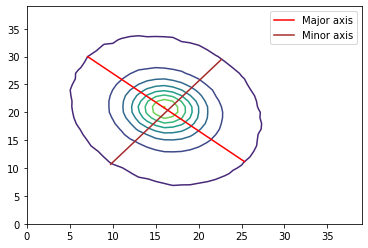

In [10]:
plt.contour(img[1015:1055,1010:1050])                              
plt.plot([7.079,25.347],[29.972,11.149],color='red',label="Major axis")    #the major axis of the outermost contour
plt.plot([9.75,22.645],[10.678,29.461],color='brown',label="Minor axis")   #the minor axis of the outermost contour
plt.legend()

For outermost isophote, the length of major and minor axes are

major axis,b=($\sqrt((7.079-25.347)^2+(29.972-11.149)^2))$)=26.23

minor axis,a=($\sqrt((9.75-22.645)^2+(10.678-29.461)^2))$)=22.781

In [11]:
b=26.23
a=22.781

print(f"n={n(a,b)}")

n=1.314906595501335


So, the outermost isophote has an n value of 1.2923323904900241. This tells us that outermost contour is less elongated and more circular in shape as compared to innermost contour.

By the data above, we get to know that since a galaxy is determined by E$_n$ value, the galaxy in this case is of E$_1$ type.

### Radial surface brightness profile of galaxy 

I$_{sky}$ for some points is:

0.215,0.200,0.196,0.186,0.192

average I$_{sky}$=$\frac{0.215+0.200+0.196+0.186+0.192}{5}$=0.1978

In [12]:
#the centre of the galaxy is measured to be at (1026,1035.78)
x1=range(1026,2007,10)                                        
#this is the range from centre of galaxy to where the light reaches within the image(R+)
x2=range(46,1027,10)                                    
#this is the range from centre to other side of galaxy(R-)

y1=[]
y2=[]
for i in x1:
    m=img[i,int(-1.03*(i-1017.079)+1044.972)]-0.1978               #intensity defined for R+  
    y1.append(m)

for i in x2:
    n=img[i,int(-1.03*(i-1017.079)+1044.972)]-0.1978               #intensity defined for R-
    y2.append(n)
y=[]

for i in range(99):                                                #averaging the values of intensity for R+ and R-
    a=(y1[i]+y2[15-i])/2
    y.append(a)

print(x1)
print(y)                                                           #these are values of intensity averages for the galaxy at R

range(1026, 2007, 10)
[2.4577149406194687, 18.52533442826271, 1.94342424274683, 0.8929112061977387, 0.5268984764933586, 0.3744169727087021, 0.24561884553432467, 0.19632506669759753, 0.14261331708431246, 0.1377328366160393, 0.08337097169160843, 0.07484636754989624, 0.09157902301549911, 0.03718061299324035, 0.03775357009172439, 0.01523383260965347, 2.4842081919431687, 1.027532960486412, 0.5924303338050843, 0.42600178272724154, 0.28132181168794634, 0.21959627718925478, 0.17279015035629275, 0.15266106576919558, 0.10160322786569595, 0.10495269597768783, 0.08765499593019485, 0.05776652247905731, 0.06521528513431549, 0.04715624005794525, 0.018366310012340542, 0.020599755656719204, 0.03427870870828628, 0.033411200356483456, 0.010801303398609158, 0.02347875685691833, 0.03733174802064895, 0.021080571424961086, 0.03148506880998611, 0.0264501825094223, 0.017597194027900692, 0.014815318596363064, 0.005432444822788235, 0.009724567842483517, 0.022965128731727597, 0.018577802193164822, 0.0260591015338

Text(0.5, 1.0, 'Radial Surface Brightness Distribution curve')

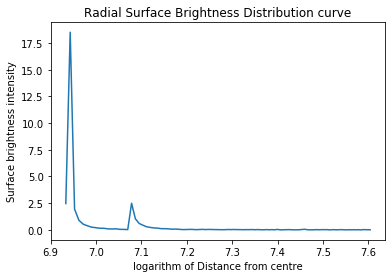

In [13]:
plt.plot(np.log(x1),y)
plt.xlabel("logarithm of Distance from centre")
plt.ylabel("Surface brightness intensity")
plt.title("Radial Surface Brightness Distribution curve")

### How does the plot look like at small radii? Can you provide an explanation for this?

At small distance from the centre, the curve appears rising because the intensity of light is maximum at the centre. This curve has a steep downward slope because as we move away from the centre, the light intensity decreases at a rapid rate.

The rate of decrement is given by de Vaucouleurs' law (the R$^{1/4}$ law). This law has been proved above.
